<a href="https://colab.research.google.com/github/rshiv1029/Digit_Recognizer_MNIST/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import sys
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv,concat,Series
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# print(os.listdir("../input/digit-recognizer/"))

train_name = "/content/drive/MyDrive/train.csv"
train = read_csv(train_name)

test_name = "/content/drive/MyDrive/test.csv"
test = read_csv(test_name)

print("Training set dimensions: " + str(train.shape))
print("Testing set dimensions: " + str(test.shape))

Training set dimensions: (42000, 785)
Testing set dimensions: (28000, 784)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = train.drop('label', axis = 1)
y = train['label']
X.shape

(42000, 784)

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

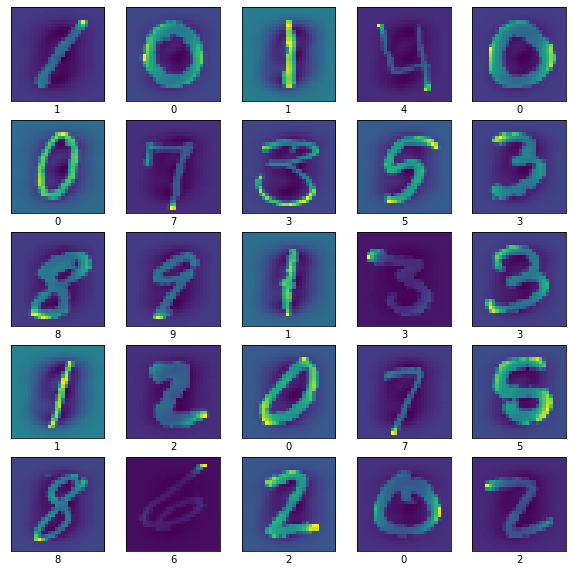

In [5]:
plt.figure(figsize = (10,10))
for i in range (25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(y[i])
    plt.imshow(X[i,:].reshape(28,28))

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)


print("X_train shape is : ",X_train.shape)
print("Y_train shape is : ", y_train.shape)
print("X_test shape is " , X_test.shape)
print("Y_test shape is " , y_test.shape)

X_train shape is :  (37800, 784)
Y_train shape is :  (37800,)
X_test shape is  (4200, 784)
Y_test shape is  (4200,)


In [7]:
logreg = LogisticRegression(random_state = 1,max_iter= 150,solver = 'sag', tol = 0.1,)
logreg.fit(X_train,y_train)

predictions = logreg.predict(X_test)
predictions

array([1, 5, 2, ..., 4, 0, 0])

In [8]:
result = logreg.predict(test)
result = Series(result,name="Label")
result.shape
submission = concat([Series(range(1,28001),name = "ImageId"),result],axis = 1)
submission.to_csv("mnist_submit.csv",index=False)

In [9]:
print("train accuracy: {} ".format(logreg.score(X_train, y_train)))
print("test accuracy: {} ".format(logreg.score(X_test, y_test)))

train accuracy: 0.9 
test accuracy: 0.8914285714285715 
